<a href="https://colab.research.google.com/github/NiEl0503/SimuladorNivel2/blob/main/SecondSimulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Simulator Télos - Nível #2**

**Contextualização**

A análise de dados é crucial para as organizações modernas, permitindo-lhes
tomar decisões informadas rapidamente. Utilizar ferramentas como PySpark para
processar e analisar dados não só aumenta a eficiência operacional, mas também
fornece insights valiosos que podem ser transformados em ações estratégicas.

Portanto, a capacidade de aplicar técnicas de análise de dados é fundamental
para qualquer profissional no campo da ciência de dados. Neste simulador, sua
squad foi contratada pela DataTech Solutions para desenvolver uma série de
análises em um dataset de notas de alunos, utilizando PySpark para extrair
insights que ajudarão na tomada de decisões educacionais.


**Instalando spark e pyspark**

In [ ]:
!pip install spark
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for spark: filename=spark-0.2.1-py3-none-any.whl size=58748 sha256=40b4958583ff7f27180a6a17aeeada3d373e9d9098ba280a666c19e55fa70c0f
  Stored in directory: /root/.cache/pip/wheels/63/88/77/b4131110ea4094540f7b47c6d62a649807d7e94800da5eab0b
Successfully built spark
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=6667c17ad8a40bb0ec9ba5ceb8e3c15e3567247f20f8307bbfee78d967800a0b
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


**Importando as bibliotecas**

In [ ]:
from pyspark.sql import SparkSession
from google.colab import files
from pyspark.sql.functions import col, sum, when
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**Criar sessão spark**

In [ ]:
spark = SparkSession.builder.appName("Notas alunos").getOrCreate()

**Baixe o arquivo**

In [ ]:
uploaded = files.upload()

Saving dados notas alunos.csv to dados notas alunos.csv


**Atribuindo um nome ao arquivo**

In [ ]:
name = next(iter(uploaded))

**Dataframe**

In [ ]:
df = spark.read.csv(name, sep=';', header=True, inferSchema=True, encoding='UTF-8')


**Histórias de Usuário a serem Implementadas**

1) Visualização e Análise Inicial dos Dados
Como analista de dados, desejo tratar os dados enviados ao sistema para
padronizá-los e assim, ser possível fazer uma análise futura, entendendo a
correlação entre cada variável e tipo de dado.

In [ ]:
# Visualização e Análise Inicial dos Dados
# a) Carregar o dataset e mostrar as primeiras linhas e o esquema DataFrame
df.show()
df.printSchema()

+---+---------+-------------+--------------------+-------------+-----------------+------------------+---------------+--------------+---------+-----------------+-------------+----------------+---------------+--------------+
| Id|   G�nero|RendaFamiliar|     EducacaoPaterna|PeriodoDeAula|FezAulaParticular|EstadoCivilDosPais|PraticaEsportes|FilhoMaisVelho|NumIrmaos|TransporteEscolar|HorasDeEstudo|notaDeMatematica|notaDePortugues|notaDeCiencias|
+---+---------+-------------+--------------------+-------------+-----------------+------------------+---------------+--------------+---------+-----------------+-------------+----------------+---------------+--------------+
|  0| feminino| Desconhecido|   superior completo|     matutino|              nao|            casado|   regularmente|           sim|        3|           onibus|          < 5|              71|             71|            74|
|  1| feminino|      grupo C| superior incompleto|     matutino|     Desconhecido|            casado|  event

In [ ]:
# Conhecer o dataframe
df.count()

30641

In [ ]:
# b) Realizar uma análise descritiva básica (média, mediana, desvios).
# Média e desvio
df.describe("notaDeMatematica", "notaDePortugues","notaDeCiencias").show()

+-------+------------------+------------------+------------------+
|summary|  notaDeMatematica|   notaDePortugues|    notaDeCiencias|
+-------+------------------+------------------+------------------+
|  count|             30641|             30641|             30641|
|   mean| 66.55771678470023| 69.37753337032082| 68.41862210763357|
| stddev|15.362465892084307|14.758951673577954|15.443524814264942|
|    min|                 0|                10|                 4|
|    max|               100|               100|               100|
+-------+------------------+------------------+------------------+



**Nota matematica** --> media: 66.55771678470023 e stddev: 15.362465892084307

**Nota portugues** --> media: 69.37753337032082 e stddev: 14.758951673577954

**Nota ciencias** --> media: 68.41862210763357 e stddev: 15.443524814264942

In [ ]:
# Mediana
maths_median = df.approxQuantile("notaDeMatematica", [0.5], 0.001)[0]
portuguese_median = df.approxQuantile("notaDePortugues", [0.5], 0.001)[0]
science_median = df.approxQuantile("notaDeCiencias", [0.5], 0.001)[0]
print(f"Mediana Matematica: {maths_median}")
print(f"Mediana Portugues: {portuguese_median}")
print(f"Mediana Ciencias: {science_median}")

**2) Limpeza e Preparação dos Dados**

Como analista de dados, preciso limpar e preparar os dados, garantindo que
estejam prontos para análises mais complexas.


In [ ]:
# a) Identificar e tratar valores nulos.

# a.1 Contar valores nulos em cada coluna
null_counts = df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
null_counts.show()

+---+------+-------------+---------------+-------------+-----------------+------------------+---------------+--------------+---------+-----------------+-------------+----------------+---------------+--------------+
| Id|G�nero|RendaFamiliar|EducacaoPaterna|PeriodoDeAula|FezAulaParticular|EstadoCivilDosPais|PraticaEsportes|FilhoMaisVelho|NumIrmaos|TransporteEscolar|HorasDeEstudo|notaDeMatematica|notaDePortugues|notaDeCiencias|
+---+------+-------------+---------------+-------------+-----------------+------------------+---------------+--------------+---------+-----------------+-------------+----------------+---------------+--------------+
|  0|     1|         1840|           1845|            0|             1830|              1190|            631|           904|     1572|             3134|          955|               0|              0|             0|
+---+------+-------------+---------------+-------------+-----------------+------------------+---------------+--------------+---------+------

In [ ]:
# a.2 Substituir valores nulos em colunas categórica

df = df.fillna({
    "G�nero": "Desconhecido",
    "RendaFamiliar":  "Desconhecido",
    "EducacaoPaterna": "Desconhecido",
    "PeriodoDeAula": "Desconhecido",
    "FezAulaParticular": "Desconhecido",
    "EstadoCivilDosPais": "Desconhecido",
    "PraticaEsportes": "Desconhecido",
    "FilhoMaisVelho": "Desconhecido",
    "TransporteEscolar": "Desconhecido",
    "HorasDeEstudo": "Desconhecido"
})
df.show()

+---+---------+-------------+--------------------+-------------+-----------------+------------------+---------------+--------------+---------+-----------------+-------------+----------------+---------------+--------------+
| Id|   G�nero|RendaFamiliar|     EducacaoPaterna|PeriodoDeAula|FezAulaParticular|EstadoCivilDosPais|PraticaEsportes|FilhoMaisVelho|NumIrmaos|TransporteEscolar|HorasDeEstudo|notaDeMatematica|notaDePortugues|notaDeCiencias|
+---+---------+-------------+--------------------+-------------+-----------------+------------------+---------------+--------------+---------+-----------------+-------------+----------------+---------------+--------------+
|  0| feminino| Desconhecido|   superior completo|     matutino|              nao|            casado|   regularmente|           sim|        3|           onibus|          < 5|              71|             71|            74|
|  1| feminino|      grupo C| superior incompleto|     matutino|     Desconhecido|            casado|  event

In [ ]:
# a.3 Calcular a mediana para coluna NumIrmaos e substituir

column_name = "NumIrmaos"

num_siblings_median = df.approxQuantile("NumIrmaos", [0.5], 0.001)[0]
print(f"Mediana Num Irmaos: {num_siblings_median}")

column_name = "NumIrmaos"

# Função para calcular a mediana
def calculate_median(df, column):
    quantiles = df.approxQuantile(column, [0.5], 0.01)
    return quantiles[0]

median_value = calculate_median(df, column_name)

# Substituir valores nulos na coluna "NumIrmaos" pela mediana
df = df.fillna({column_name: median_value})

df.show()

Mediana Num Irmaos: 2.0
+---+---------+-------------+--------------------+-------------+-----------------+------------------+---------------+--------------+---------+-----------------+-------------+----------------+---------------+--------------+
| Id|   G�nero|RendaFamiliar|     EducacaoPaterna|PeriodoDeAula|FezAulaParticular|EstadoCivilDosPais|PraticaEsportes|FilhoMaisVelho|NumIrmaos|TransporteEscolar|HorasDeEstudo|notaDeMatematica|notaDePortugues|notaDeCiencias|
+---+---------+-------------+--------------------+-------------+-----------------+------------------+---------------+--------------+---------+-----------------+-------------+----------------+---------------+--------------+
|  0| feminino| Desconhecido|   superior completo|     matutino|              nao|            casado|   regularmente|           sim|        3|           onibus|          < 5|              71|             71|            74|
|  1| feminino|      grupo C| superior incompleto|     matutino|     Desconhecido|  

In [ ]:
# a.4 Contar valores nulos após a atribuição
null_counts_after = df.select([F.sum(F.col(c).isNull().cast("int")).alias(c) for c in df.columns])
null_counts_after.show()

+---+------+-------------+---------------+-------------+-----------------+------------------+---------------+--------------+---------+-----------------+-------------+----------------+---------------+--------------+
| Id|G�nero|RendaFamiliar|EducacaoPaterna|PeriodoDeAula|FezAulaParticular|EstadoCivilDosPais|PraticaEsportes|FilhoMaisVelho|NumIrmaos|TransporteEscolar|HorasDeEstudo|notaDeMatematica|notaDePortugues|notaDeCiencias|
+---+------+-------------+---------------+-------------+-----------------+------------------+---------------+--------------+---------+-----------------+-------------+----------------+---------------+--------------+
|  0|     0|            0|              0|            0|                0|                 0|              0|             0|        0|                0|            0|               0|              0|             0|
+---+------+-------------+---------------+-------------+-----------------+------------------+---------------+--------------+---------+------

In [ ]:
# b) Normalizar e formatar as colunas conforme necessário

rename_columns = {
    "G�nero": "Genero",
    "RendaFamiliar":  "Renda Familiar",
    "EducacaoPaterna": "Educacao Paterna",
    "PeriodoDeAula": "Periodo De Aula",
    "FezAulaParticular": "Fez Aula Particular",
    "EstadoCivilDosPais": "Estado Civil Dos Pais",
    "PraticaEsportes": "Pratica Esportes",
    "FilhoMaisVelho": "Filho Mais Velho",
    "NumIrmaos": "Num Irmaos",
    "TransporteEscolar": "Transporte Escolar",
    "HorasDeEstudo": "Horas De Estudo",
    "notaDeMatematica" : "Nota De Matematica",
    "notaDePortugues": "Nota De Portugues",
    "notaDeCiencias": "Nota De Ciencias"
}

for old_name, new_name in rename_columns.items():
    df = df.withColumnRenamed(old_name, new_name)

df.show()

+---+---------+--------------+--------------------+---------------+-------------------+---------------------+----------------+----------------+----------+------------------+---------------+------------------+-----------------+----------------+
| Id|   Genero|Renda Familiar|    Educacao Paterna|Periodo De Aula|Fez Aula Particular|Estado Civil Dos Pais|Pratica Esportes|Filho Mais Velho|Num Irmaos|Transporte Escolar|Horas De Estudo|Nota De Matematica|Nota De Portugues|Nota De Ciencias|
+---+---------+--------------+--------------------+---------------+-------------------+---------------------+----------------+----------------+----------+------------------+---------------+------------------+-----------------+----------------+
|  0| feminino|  Desconhecido|   superior completo|       matutino|                nao|               casado|    regularmente|             sim|         3|            onibus|            < 5|                71|               71|              74|
|  1| feminino|       gr

3) Análise Avançada: Relação entre Renda Familiar e Notas

Como analista de dados, quero explorar como a renda familiar influencia o
desempenho dos alunos.


In [ ]:
# a) Agrupar os dados por renda familiar e calcular a média das notas
df_grouped = df.groupBy("Renda Familiar").agg(
    F.avg("Nota De Matematica").alias("Media Nota Matematica"),
    F.avg("Nota De Portugues").alias("Media Nota Portugues"),
    F.avg("Nota De Ciencias").alias("Media Nota Ciencias")
).orderBy("Renda Familiar")

df_grouped.show()

+--------------+---------------------+--------------------+-------------------+
|Renda Familiar|Media Nota Matematica|Media Nota Portugues|Media Nota Ciencias|
+--------------+---------------------+--------------------+-------------------+
|  Desconhecido|    66.18586956521739|   68.91576086956522|  67.90054347826087|
|       grupo A|    62.99188823794502|   66.78774222622803|  65.25191527715187|
|       grupo B|   63.490216271884655|   67.32046000686577|  65.89512530037761|
|       grupo C|    64.69344333478072|   68.43823273990448|  66.99924012158054|
|       grupo D|    67.66640010662401|   70.38224710115954|  70.89084366253499|
|       grupo E|    75.29893590695373|   74.25142291512002|  72.67706013363029|
+--------------+---------------------+--------------------+-------------------+



b) Analisar se existe uma correlação visível

In [ ]:
# Calcular a porcentagem de "Desconhecido" dentro da coluna Renda Familiar
# Contar o número total de linhas
total_rows = df.count()

# Contar o número de linhas com "Desconhecido" na coluna "Renda Familiar"
unknown_rows = df.filter(col("Renda Familiar") == "Desconhecido").count()

# Calcular a porcentagem
percentage_unknown = (unknown_rows / total_rows) * 100

print(f"Porcentagem de valores 'Desconhecido': {percentage_unknown:.2f}%")



Porcentagem de valores 'Desconhecido': 6.01%


**O grupo de desconhecidos representa 6,01% dos meus dados, por isso optou-se por realizar os cálculos sem eles.**

In [ ]:
# Removendo linhas com valores "Desconhecido" da coluna "Renda Familiar"
df_clean = df.filter(col("Renda Familiar") != "Desconhecido")

In [ ]:
# Agrupamento por renda familiar sem os valores de "Desconhecido"
df_grouped = df_clean.groupBy("Renda Familiar").agg(
    F.avg("Nota De Matematica").alias("Media Nota Matematica"),
    F.avg("Nota De Portugues").alias("Media Nota Portugues"),
    F.avg("Nota De Ciencias").alias("Media Nota Ciencias")
).orderBy("Renda Familiar")

df_grouped.show()

+--------------+---------------------+--------------------+-------------------+
|Renda Familiar|Media Nota Matematica|Media Nota Portugues|Media Nota Ciencias|
+--------------+---------------------+--------------------+-------------------+
|       grupo A|    62.99188823794502|   66.78774222622803|  65.25191527715187|
|       grupo B|   63.490216271884655|   67.32046000686577|  65.89512530037761|
|       grupo C|    64.69344333478072|   68.43823273990448|  66.99924012158054|
|       grupo D|    67.66640010662401|   70.38224710115954|  70.89084366253499|
|       grupo E|    75.29893590695373|   74.25142291512002|  72.67706013363029|
+--------------+---------------------+--------------------+-------------------+



In [ ]:
# Atribuição de valores numéricos aos grupos da renda familiar
df1 = df_grouped.withColumn(
    "Renda Familiar Numérica",
     when(col("Renda Familiar") == "grupo A", 5)
    .when(col("Renda Familiar") == "grupo B", 4)
    .when(col("Renda Familiar") == "grupo C", 3)
    .when(col("Renda Familiar") == "grupo D", 2)
    .when(col("Renda Familiar") == "grupo E", 1)
)
df1.show()

+--------------+---------------------+--------------------+-------------------+-----------------------+
|Renda Familiar|Media Nota Matematica|Media Nota Portugues|Media Nota Ciencias|Renda Familiar Numérica|
+--------------+---------------------+--------------------+-------------------+-----------------------+
|       grupo A|    62.99188823794502|   66.78774222622803|  65.25191527715187|                      5|
|       grupo B|   63.490216271884655|   67.32046000686577|  65.89512530037761|                      4|
|       grupo C|    64.69344333478072|   68.43823273990448|  66.99924012158054|                      3|
|       grupo D|    67.66640010662401|   70.38224710115954|  70.89084366253499|                      2|
|       grupo E|    75.29893590695373|   74.25142291512002|  72.67706013363029|                      1|
+--------------+---------------------+--------------------+-------------------+-----------------------+



In [ ]:
# b.1) Correlação entre notas e renda familiar
math_correlation = df1.stat.corr("Renda Familiar Numérica", "Media Nota Matematica")
portuguese_correlation = df1.stat.corr("Renda Familiar Numérica", "Media Nota Portugues")
science_correlation = df1.stat.corr("Renda Familiar Numérica", "Media Nota Ciencias")

print("Correlação entre Renda Familiar e nota de Matemática:", math_correlation)
print("Correlação entre Renda Familiar e nota de Português:", portuguese_correlation)
print("Correlação entre Renda Familiar e nota de Ciências:", science_correlation)

Correlação entre Renda Familiar e nota de Matemática: -0.8976274225493943
Correlação entre Renda Familiar e nota de Português: -0.9407191918789661
Correlação entre Renda Familiar e nota de Ciências: -0.9612244682745095


**Analisando os dados**

Correlação próxima de 1: Indica uma forte relação positiva entre as variáveis. À medida que uma variável aumenta, a outra também tende a aumentar.

Correlação próxima de -1: Indica uma forte relação negativa entre as variáveis. À medida que uma variável aumenta, a outra tende a diminuir.

Correlação próxima de 0: Indica uma fraca ou nenhuma relação linear entre as variáveis


###**Correlação entre Renda Familiar e nota de Matemática: -0.8976**

Significado: Há uma forte correlação negativa entre a renda familiar e a nota de matemática. Isso sugere que, à medida que a renda familiar aumenta, a nota de matemática tende a diminuir, e vice-versa.

###**Correlação entre Renda Familiar e nota de Português: -0.9407**

Significado: Existe uma forte correlação negativa entre a renda familiar e a nota de português. Similar ao caso da matemática, uma renda familiar maior está associada a notas menores em português, e uma renda menor está associada a notas maiores.

###**Correlação entre Renda Familiar e nota de Ciências: -0.9612**

Significado: A correlação negativa entre a renda familiar e a nota de ciências é ainda mais forte do que as observadas para matemática e português. Isso indica uma relação inversa muito significativa, onde um aumento na renda familiar está fortemente associado a uma diminuição nas notas de ciências.

In [ ]:
# b.2) Correlação entre notas e horas de estudo
# Normalizar "Horas De Estudo "
df2 = df_clean.withColumn("Horas De Estudo Numérica",
   when(F.col("Horas De Estudo") == "< 5", 2.5)
  .when(F.col("Horas De Estudo") == "> 5 < 10", 7.5)
  .when(F.col("Horas De Estudo") == "> 10", 12.5)
  .otherwise(0))

In [ ]:
df2.show()

+---+---------+--------------+--------------------+---------------+-------------------+---------------------+----------------+----------------+----------+------------------+---------------+------------------+-----------------+----------------+------------------------+
| Id|   Genero|Renda Familiar|    Educacao Paterna|Periodo De Aula|Fez Aula Particular|Estado Civil Dos Pais|Pratica Esportes|Filho Mais Velho|Num Irmaos|Transporte Escolar|Horas De Estudo|Nota De Matematica|Nota De Portugues|Nota De Ciencias|Horas De Estudo Numérica|
+---+---------+--------------+--------------------+---------------+-------------------+---------------------+----------------+----------------+----------+------------------+---------------+------------------+-----------------+----------------+------------------------+
|  1| feminino|       grupo C| superior incompleto|       matutino|       Desconhecido|               casado|   eventualmente|             sim|         0|      Desconhecido|       > 5 < 10|    

In [ ]:
math_correlation2 = df2.stat.corr("Horas De Estudo Numérica", "Nota De Matematica")
portuguese_correlation2 = df2.stat.corr("Horas De Estudo Numérica", "Nota De Portugues")
science_correlation2 = df2.stat.corr("Horas De Estudo Numérica", "Nota De Ciencias")

print("Correlação entre Horas De Estudo e nota de Matemática:", math_correlation2)
print("Correlação entre Horas De Estudo e nota de Português:", portuguese_correlation2)
print("Correlação entre Horas De Estudo e nota de Ciências:", science_correlation2)

Correlação entre Horas De Estudo e nota de Matemática: 0.08448923207880697
Correlação entre Horas De Estudo e nota de Português: 0.04776962072261404
Correlação entre Horas De Estudo e nota de Ciências: 0.05414230643344282


###**Correlação entre Horas De Estudo e nota de Matemática: 0.0845**

Significado: Há uma correlação positiva muito fraca entre as horas de estudo e a nota de matemática. Isso indica que existe uma relação muito fraca e positiva, ou seja, um leve aumento nas horas de estudo pode estar associado a um leve aumento na nota de matemática, mas a relação é praticamente insignificante.

###**Correlação entre Horas De Estudo e nota de Português: 0.0478**

Significado: A correlação entre horas de estudo e nota de português é extremamente baixa e positiva. Isso sugere que a relação entre as horas de estudo e as notas de português é quase inexistente ou muito fraca.

###**Correlação entre Horas De Estudo e nota de Ciências: 0.0541**

Significado: Assim como nos outros casos, a correlação é muito baixa e positiva. Isso sugere que não há uma relação significativa entre as horas de estudo e as notas de ciências.

**A falta de uma correlação significativa pode sugerir que outros fatores além das horas de estudo podem estar influenciando as notas. É possível que a qualidade do estudo, métodos de ensino, ou outros aspectos não capturados por essas variáveis estejam desempenhando um papel mais importante.**

Correlação vs. Causalidade: a correlação não implica causalidade. Mesmo que não haja uma correlação significativa, não significa que as horas de estudo não possam ter um efeito sobre as notas de outras maneiras ou em diferentes contextos

In [ ]:
# b.3) Correlação entre notas e Fez Aula Particular
# Normalizar "Fez Aula Particular"
df3 = df_clean.withColumn("Fez Aula Particular Numérica",
    F.when(F.col("Fez Aula Particular") == "sim", 1)
     .when(F.col("Fez Aula Particular") == "nao", 0)
     .otherwise(None))

In [ ]:
# Calcular a porcentagem de "Desconhecido" dentro da coluna Fez Aula Particular
# Contar o número total de linhas
total_rows = df.count()

# Contar o número de linhas com "Desconhecido" na coluna "Renda Familiar"
unknown_rows = df.filter(col("Fez Aula Particular") == "Desconhecido").count()

# Calcular a porcentagem
percentage_unknown = (unknown_rows / total_rows) * 100

print(f"Porcentagem de valores 'Desconhecido': {percentage_unknown:.2f}%")

Porcentagem de valores 'Desconhecido': 5.97%


**O grupo de desconhecidos representa 5,97% dos meus dados, por isso optou-se por realizar os cálculos sem eles.**

In [ ]:
# Removendo linhas com valores "Desconhecido" da coluna "Fez Aula Particular"
df_clean1 = df3.filter(col("Fez Aula Particular") != "Desconhecido")

In [ ]:
df_clean1.show()

+---+---------+--------------+--------------------+---------------+-------------------+---------------------+----------------+----------------+----------+------------------+---------------+------------------+-----------------+----------------+----------------------------+
| Id|   Genero|Renda Familiar|    Educacao Paterna|Periodo De Aula|Fez Aula Particular|Estado Civil Dos Pais|Pratica Esportes|Filho Mais Velho|Num Irmaos|Transporte Escolar|Horas De Estudo|Nota De Matematica|Nota De Portugues|Nota De Ciencias|Fez Aula Particular Numérica|
+---+---------+--------------+--------------------+---------------+-------------------+---------------------+----------------+----------------+----------+------------------+---------------+------------------+-----------------+----------------+----------------------------+
|  2| feminino|       grupo B|            mestrado|       matutino|                nao|             solteiro|   eventualmente|             sim|         4|            onibus|        

In [ ]:
math_correlation3 = df_clean1.stat.corr("Fez Aula Particular Numérica", "Nota De Matematica")
portuguese_correlation3 = df_clean1.stat.corr("Fez Aula Particular Numérica", "Nota De Portugues")
science_correlation3 = df_clean1.stat.corr("Fez Aula Particular Numérica", "Nota De Ciencias")

print("Correlação entre Fez Aula Particular e nota de Matemática:", math_correlation3)
print("Correlação entre Fez Aula Particular e nota de Português:", portuguese_correlation3)
print("Correlação entre Fez Aula Particular e nota de Ciências:", science_correlation3)

Correlação entre Fez Aula Particular e nota de Matemática: 0.1419090473191892
Correlação entre Fez Aula Particular e nota de Português: 0.21474373984644113
Correlação entre Fez Aula Particular e nota de Ciências: 0.29516746937007965


###**Correlação entre e Fez Aula Particulare de nota de Matemática (0.1419):**

Significado: A correlação é baixa e positiva, indicando uma relação fraca entre ter feito aula particular e a nota em Matemática. Ou seja, a presença de aulas particulares não parece ter um impacto significativo nas notas de Matemática.

###**Correlação entre e Fez Aula Particulare nota de Português (0.2147):**

Significado: A correlação é um pouco mais alta, mas ainda considerada baixa. Existe uma relação positiva fraca entre aulas particulares e as notas em Português. Isso sugere que, embora haja uma leve tendência para notas mais altas em Português com a frequência a aulas particulares, o efeito não é muito forte.

###**Correlação entre e Fez Aula Particulare nota de Ciências (0.2952):**

Significado: Esta correlação é a mais alta entre as três disciplinas, ainda assim, é considerada moderada. Indica uma relação positiva moderada entre ter feito aula particular e a nota em Ciências, sugerindo que aulas particulares podem ter um impacto mais notável nas notas de Ciências em comparação com Matemática e Português.

**Em resumo, os dados sugerem que aulas particulares têm um impacto mais significativo nas notas de Ciências do que nas outras disciplinas analisadas, mas o impacto ainda é relativamente modesto em todos os casos. É importante considerar outros fatores que podem influenciar as notas, além da frequência a aulas particulares.**

In [ ]:
# b.4) Correlação entre notas e Pratica Esportes
# Normalizar "Pratica Esportes"

df4 = df_clean.withColumn("Pratica Esportes Numérica",
    F.when(F.col("Pratica Esportes") == "regularmente",1)
     .when(F.col("Pratica Esportes") == "eventualmente",0.5)
     .when(F.col("Pratica Esportes") == "nunca", 0)
     .otherwise(None))

In [ ]:
# Calcular a porcentagem de "Desconhecido" dentro da coluna Pratica Esportes
# Contar o número total de linhas
total_rows = df.count()

# Contar o número de linhas com "Desconhecido" na coluna "Renda Familiar"
unknown_rows = df.filter(col("Pratica Esportes") == "Desconhecido").count()

# Calcular a porcentagem
percentage_unknown = (unknown_rows / total_rows) * 100

print(f"Porcentagem de valores 'Desconhecido': {percentage_unknown:.2f}%")

Porcentagem de valores 'Desconhecido': 2.06%


O grupo de desconhecidos representa 2,06% dos meus dados, por isso optou-se por realizar os cálculos sem eles.

In [ ]:
# Removendo linhas com valores "Desconhecido" da coluna "Fez Aula Particular"
df_clean2 = df4.filter(col("Pratica Esportes") != "Desconhecido")

In [ ]:
df_clean2.show()

+---+---------+--------------+--------------------+---------------+-------------------+---------------------+----------------+----------------+----------+------------------+---------------+------------------+-----------------+----------------+-------------------------+
| Id|   Genero|Renda Familiar|    Educacao Paterna|Periodo De Aula|Fez Aula Particular|Estado Civil Dos Pais|Pratica Esportes|Filho Mais Velho|Num Irmaos|Transporte Escolar|Horas De Estudo|Nota De Matematica|Nota De Portugues|Nota De Ciencias|Pratica Esportes Numérica|
+---+---------+--------------+--------------------+---------------+-------------------+---------------------+----------------+----------------+----------+------------------+---------------+------------------+-----------------+----------------+-------------------------+
|  1| feminino|       grupo C| superior incompleto|       matutino|       Desconhecido|               casado|   eventualmente|             sim|         0|      Desconhecido|       > 5 < 10| 

In [ ]:
math_correlation4 = df_clean2.stat.corr("Pratica Esportes Numérica", "Nota De Matematica")
portuguese_correlation4 = df_clean2.stat.corr("Pratica Esportes Numérica", "Nota De Portugues")
science_correlation4 = df_clean2.stat.corr("Pratica Esportes Numérica", "Nota De Ciencias")

print("Correlação entre Pratica Esportes e nota de Matemática:", math_correlation4)
print("Correlação entre Pratica Esportes e nota de Português:", portuguese_correlation4)
print("Correlação entre Pratica Esportes e nota de Ciências:", science_correlation4)

Correlação entre Pratica Esportes e nota de Matemática: 0.06156567814148945
Correlação entre Pratica Esportes e nota de Português: 0.0295992133523933
Correlação entre Pratica Esportes e nota de Ciências: 0.04960291433587658


###**Correlação entre Pratica Esportes e nota de Matemática (0.0616):**

Significado: A correlação é muito baixa e positiva, o que sugere que não há uma relação significativa entre a prática de esportes e as notas em Matemática. A influência da prática de esportes nas notas de Matemática parece ser quase nula.

###**Correlação entre Pratica Esportes e nota de Português (0.0296):**

Significado: A correlação é extremamente baixa e positiva, indicando que a prática de esportes tem uma relação quase inexistente com as notas em Português. Esse valor sugere que a prática de esportes não tem impacto relevante nas notas dessa disciplina.

###**Correlação entre Pratica Esportes e nota de Ciências (0.0496):**

Significado: A correlação também é muito baixa e positiva, similar ao caso de Português. A prática de esportes tem uma relação muito fraca com as notas em Ciências, indicando que a prática esportiva não parece influenciar de maneira significativa as notas nessa disciplina.

**Os valores de correlação mostram que a prática de esportes tem uma relação muito fraca com as notas em Matemática, Português e Ciências. Isso sugere que, de acordo com esses dados, a prática de esportes não tem um impacto significativo nas notas escolares nessas disciplinas.**

In [ ]:
# Suponha que df seja o DataFrame PySpark original
df_normalized = df.toPandas()


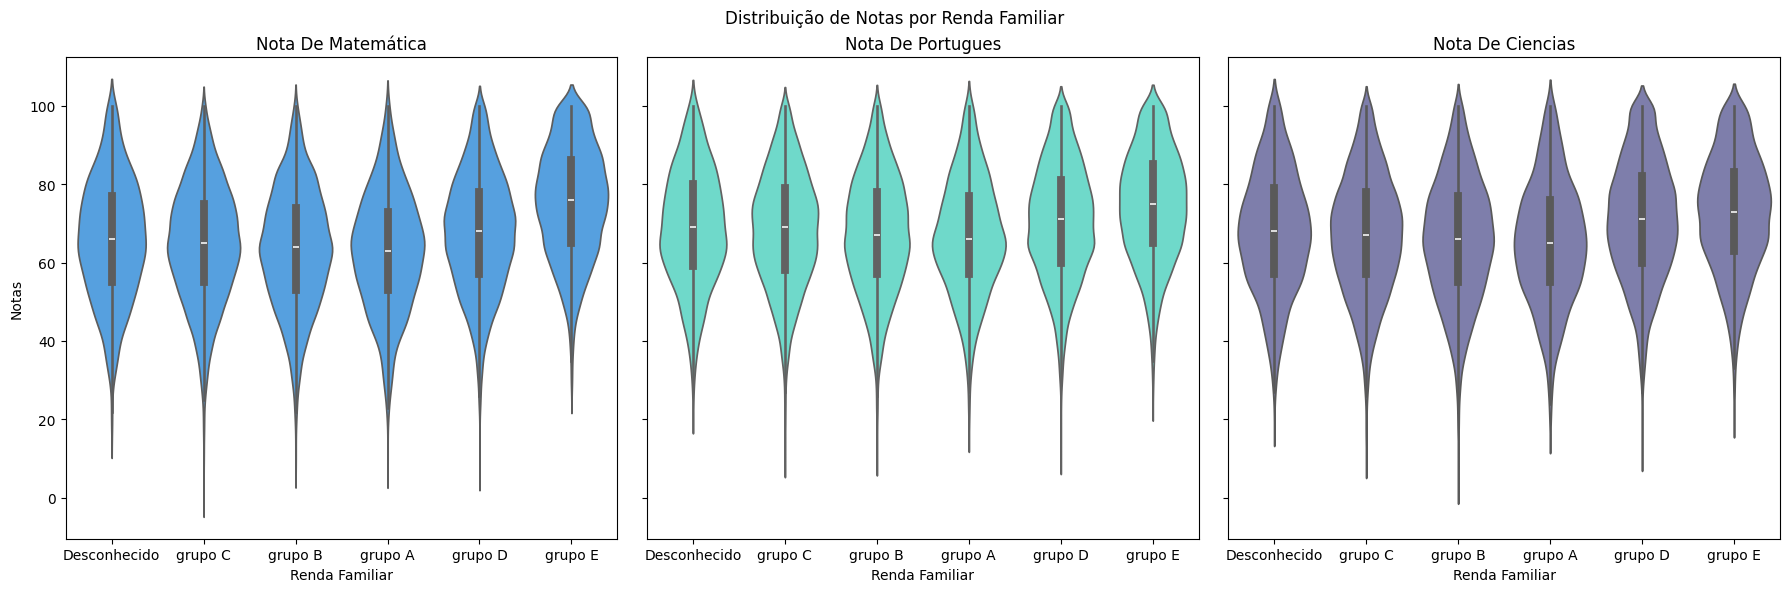

In [ ]:
# Histórias de Usuário
# 4) Visualização de Dados
  # Mostrar gráficos de distribuição de notas por categorias.

# a) Renda Familiar
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)


sns.violinplot(data=df_normalized, x="Renda Familiar", y="Nota De Matematica", ax=axes[0], color="#3FA2F6")
axes[0].set_title("Nota De Matemática")
axes[0].set_xlabel("Renda Familiar")
axes[0].set_ylabel("Notas")

sns.violinplot(data=df_normalized, x="Renda Familiar", y="Nota De Portugues", ax=axes[1], color="#5DEBD7")
axes[1].set_title("Nota De Portugues")
axes[1].set_xlabel("Renda Familiar")


sns.violinplot(data=df_normalized, x="Renda Familiar", y="Nota De Ciencias", ax=axes[2], color="#7776B3")
axes[2].set_title("Nota De Ciencias")
axes[2].set_xlabel("Renda Familiar")


plt.tight_layout()
plt.suptitle("Distribuição de Notas por Renda Familiar")
plt.subplots_adjust(top=0.9)

plt.show()



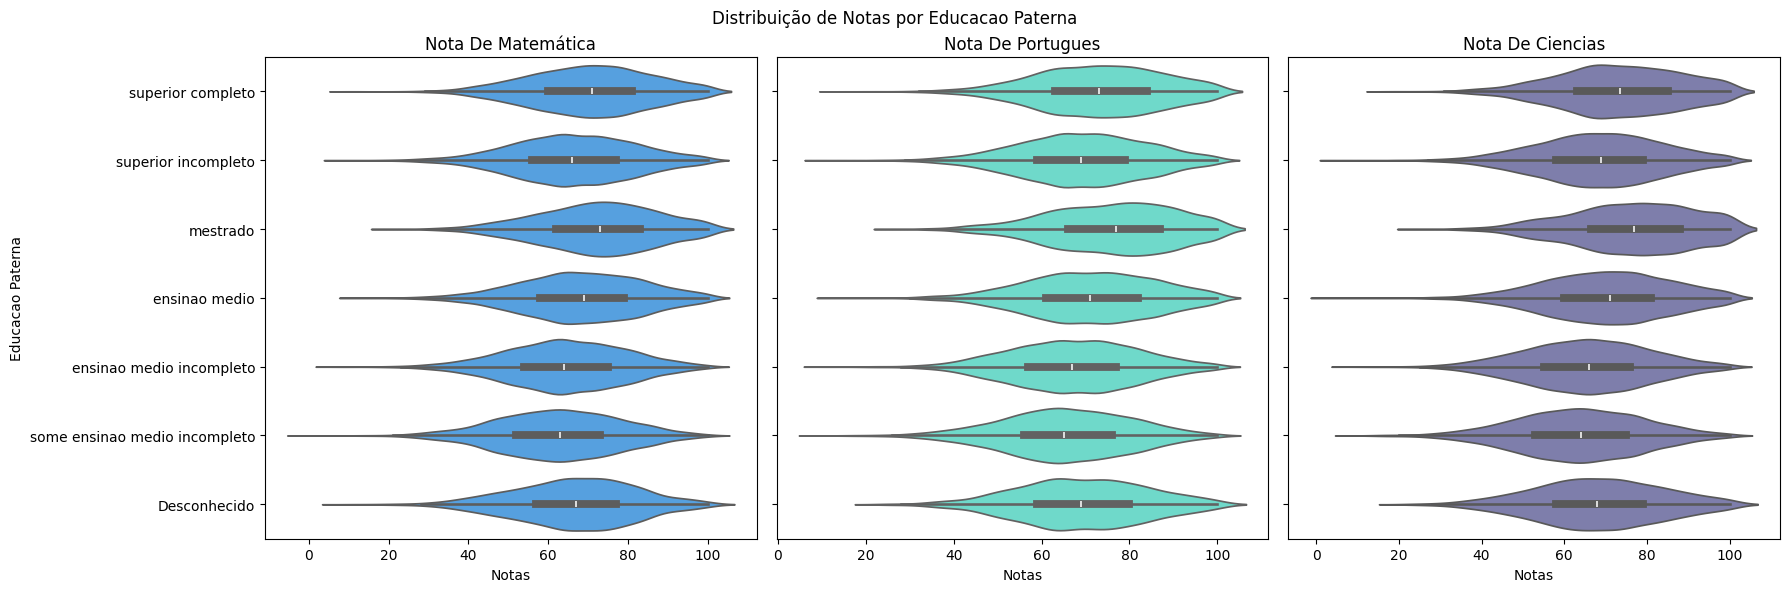

In [ ]:
# b) Educacao Paterna
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

sns.violinplot(data=df_normalized, x="Nota De Matematica", y="Educacao Paterna", ax=axes[0], color="#3FA2F6")
axes[0].set_title("Nota De Matemática")
axes[0].set_xlabel("Notas")
axes[0].set_ylabel("Educacao Paterna")

sns.violinplot(data=df_normalized, x="Nota De Portugues", y="Educacao Paterna", ax=axes[1], color="#5DEBD7")
axes[1].set_title("Nota De Portugues")
axes[1].set_xlabel("Notas")
axes[1].set_ylabel("Educacao Paterna")

sns.violinplot(data=df_normalized, x="Nota De Ciencias", y="Educacao Paterna", ax=axes[2], color="#7776B3")
axes[2].set_title("Nota De Ciencias")
axes[2].set_xlabel("Notas")
axes[2].set_ylabel("Educacao Paterna")

plt.tight_layout()
plt.suptitle("Distribuição de Notas por Educacao Paterna")
plt.subplots_adjust(top=0.9)

plt.show()

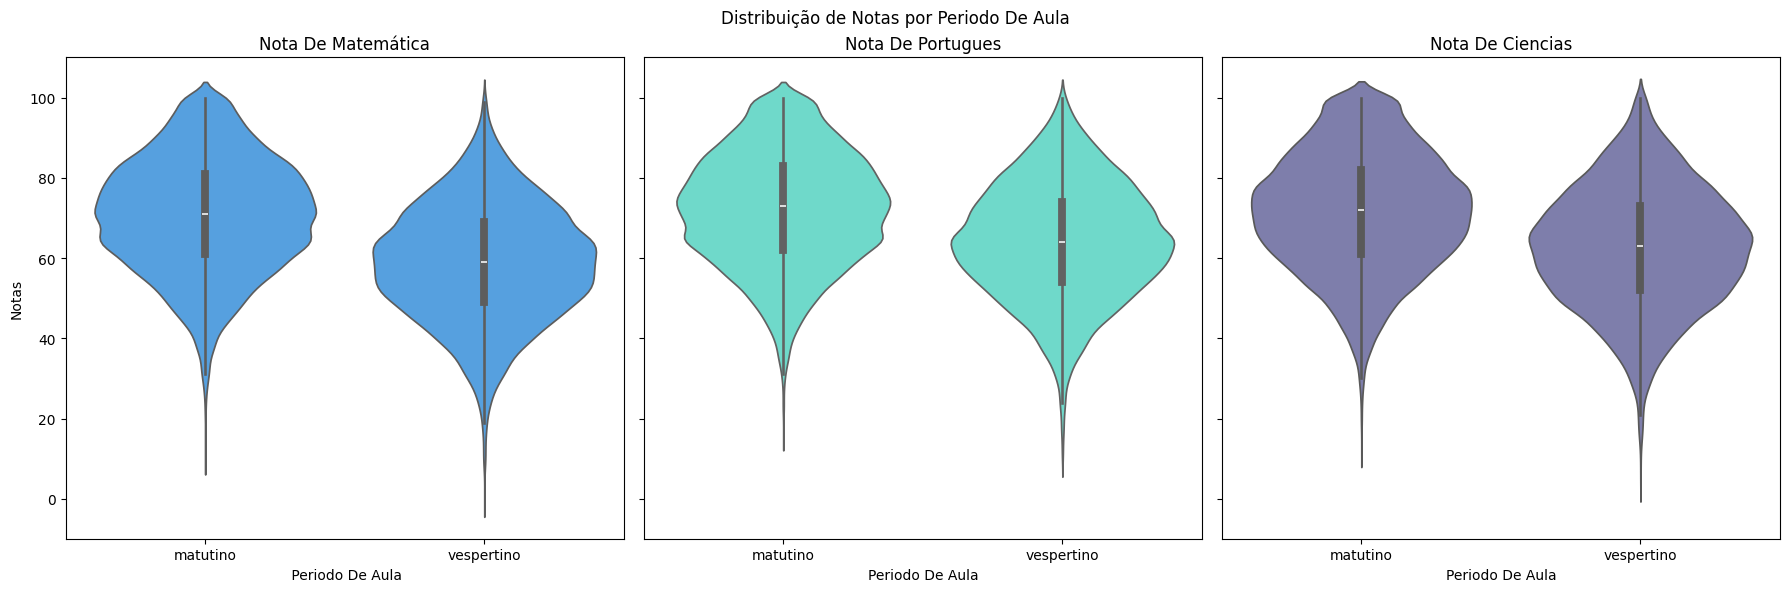

In [ ]:
#  c) Periodo De Aula
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)


sns.violinplot(data=df_normalized, x="Periodo De Aula", y="Nota De Matematica", ax=axes[0], color="#3FA2F6")
axes[0].set_title("Nota De Matemática")
axes[0].set_xlabel(" Periodo De Aula")
axes[0].set_ylabel("Notas")

sns.violinplot(data=df_normalized, x="Periodo De Aula", y="Nota De Portugues", ax=axes[1], color="#5DEBD7")
axes[1].set_title("Nota De Portugues")
axes[1].set_xlabel("Periodo De Aula")


sns.violinplot(data=df_normalized, x="Periodo De Aula", y="Nota De Ciencias", ax=axes[2], color="#7776B3")
axes[2].set_title("Nota De Ciencias")
axes[2].set_xlabel("Periodo De Aula")


plt.tight_layout()
plt.suptitle("Distribuição de Notas por Periodo De Aula")
plt.subplots_adjust(top=0.9)

plt.show()

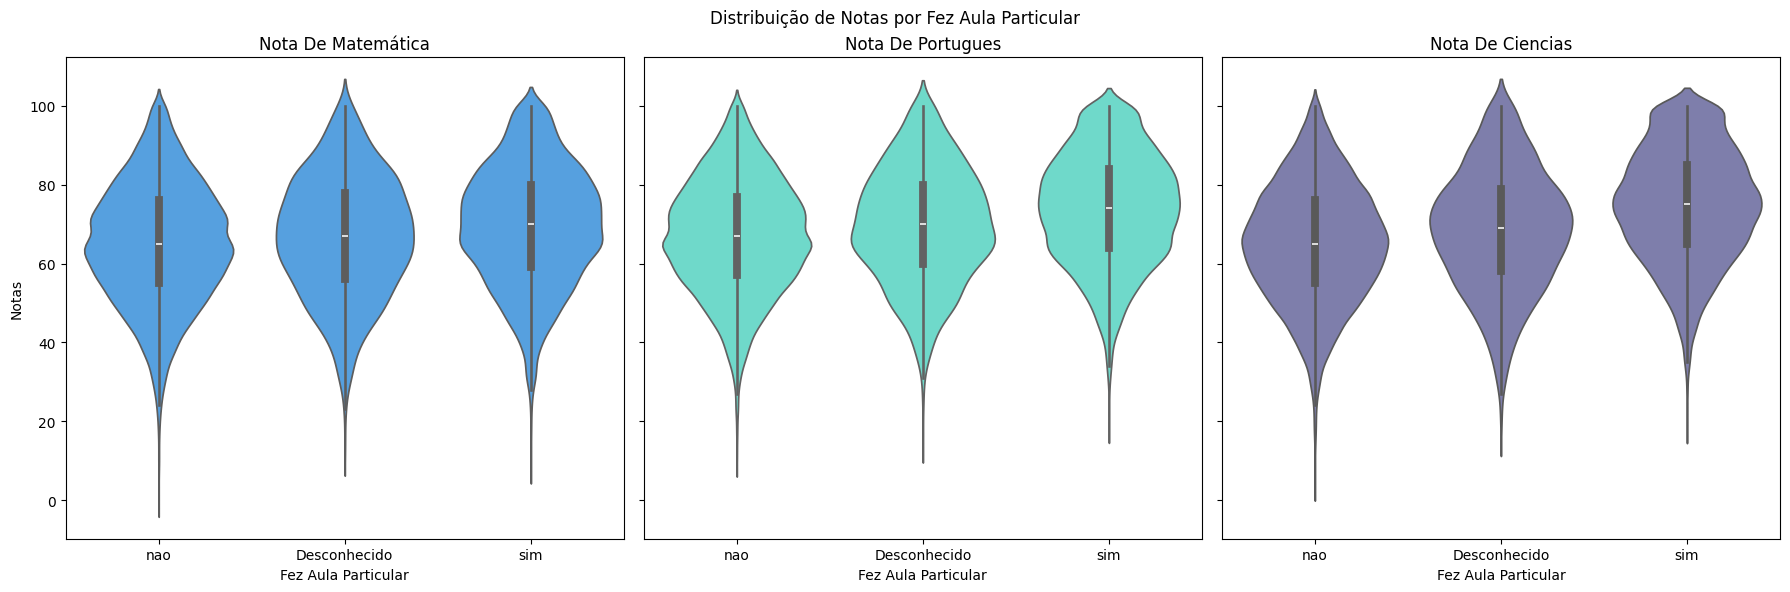

In [ ]:
# d) Fez Aula Particular
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)


sns.violinplot(data=df_normalized, x="Fez Aula Particular", y="Nota De Matematica", ax=axes[0], color="#3FA2F6")
axes[0].set_title("Nota De Matemática")
axes[0].set_xlabel("Fez Aula Particular")
axes[0].set_ylabel("Notas")

sns.violinplot(data=df_normalized, x="Fez Aula Particular", y="Nota De Portugues", ax=axes[1], color="#5DEBD7")
axes[1].set_title("Nota De Portugues")
axes[1].set_xlabel("Fez Aula Particular")


sns.violinplot(data=df_normalized, x="Fez Aula Particular", y="Nota De Ciencias", ax=axes[2], color="#7776B3")
axes[2].set_title("Nota De Ciencias")
axes[2].set_xlabel("Fez Aula Particular")


plt.tight_layout()
plt.suptitle("Distribuição de Notas por Fez Aula Particular")
plt.subplots_adjust(top=0.9)

plt.show()

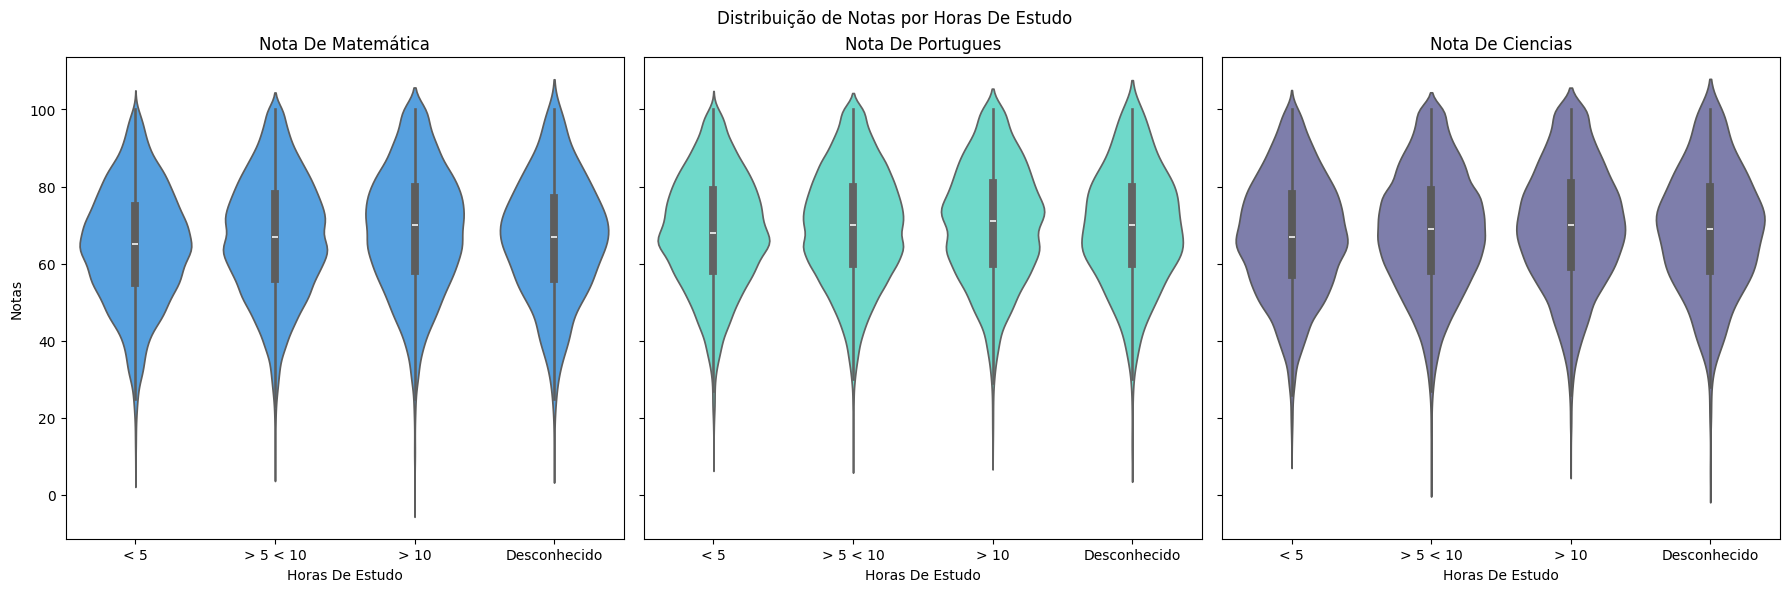

In [ ]:
# e) Horas De Estudo
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)


sns.violinplot(data=df_normalized, x="Horas De Estudo", y="Nota De Matematica", ax=axes[0], color="#3FA2F6")
axes[0].set_title("Nota De Matemática")
axes[0].set_xlabel("Horas De Estudo")
axes[0].set_ylabel("Notas")

sns.violinplot(data=df_normalized, x="Horas De Estudo", y="Nota De Portugues", ax=axes[1], color="#5DEBD7")
axes[1].set_title("Nota De Portugues")
axes[1].set_xlabel("Horas De Estudo")


sns.violinplot(data=df_normalized, x="Horas De Estudo", y="Nota De Ciencias", ax=axes[2], color="#7776B3")
axes[2].set_title("Nota De Ciencias")
axes[2].set_xlabel("Horas De Estudo")


plt.tight_layout()
plt.suptitle("Distribuição de Notas por Horas De Estudo")
plt.subplots_adjust(top=0.9)

plt.show()

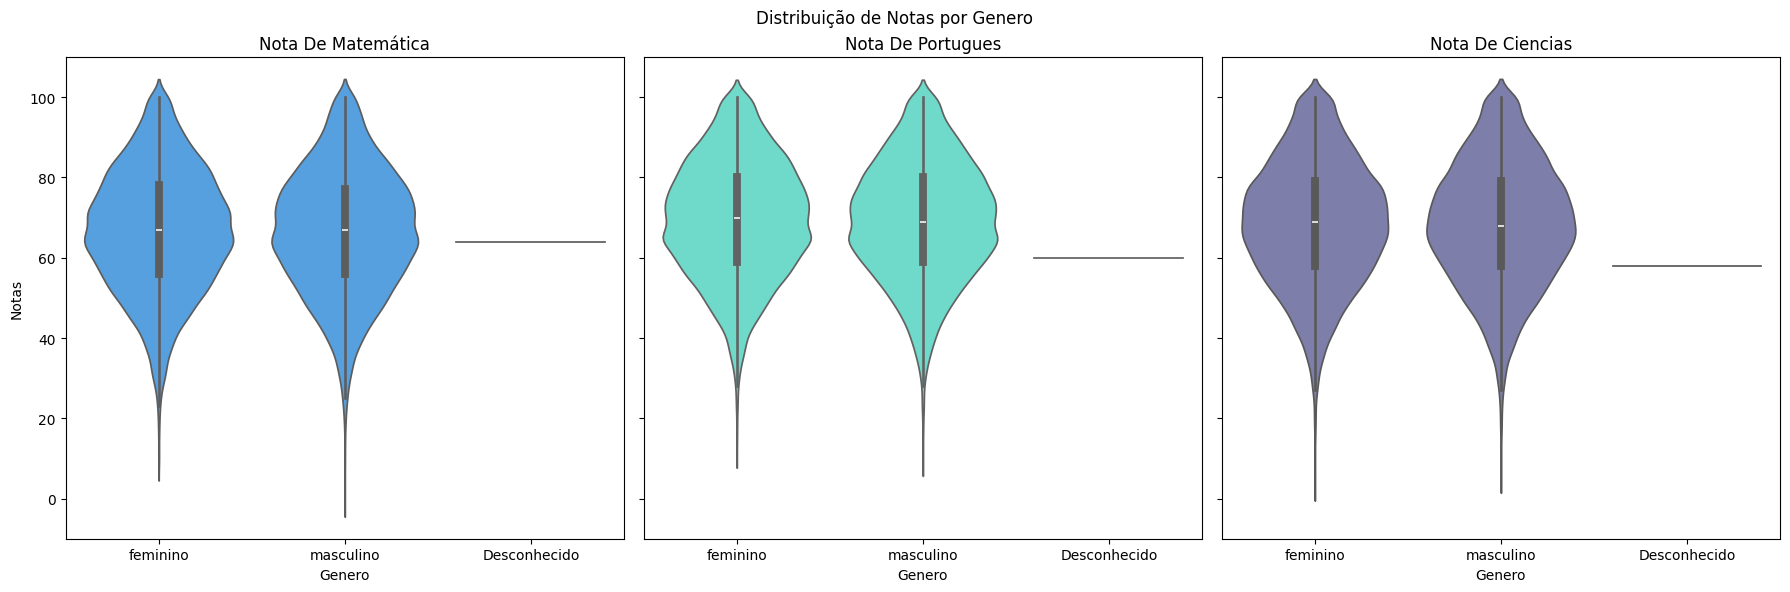

In [ ]:

# f) Genero
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)


sns.violinplot(data=df_normalized, x="Genero", y="Nota De Matematica", ax=axes[0], color="#3FA2F6")
axes[0].set_title("Nota De Matemática")
axes[0].set_xlabel("Genero")
axes[0].set_ylabel("Notas")

sns.violinplot(data=df_normalized, x="Genero", y="Nota De Portugues", ax=axes[1], color="#5DEBD7")
axes[1].set_title("Nota De Portugues")
axes[1].set_xlabel("Genero")


sns.violinplot(data=df_normalized, x="Genero", y="Nota De Ciencias", ax=axes[2], color="#7776B3")
axes[2].set_title("Nota De Ciencias")
axes[2].set_xlabel("Genero")


plt.tight_layout()
plt.suptitle("Distribuição de Notas por Genero")
plt.subplots_adjust(top=0.9)

plt.show()